In [1]:
%run ./../../utils/commonImports.py
%matplotlib inline

from utils.plot import plot_candles, set_date_axis
from base import supres

# Load data

In [105]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

db = os.path.join(dropbox_dir,'sqlite', 'ploniex-chart-data', 'BTC_LTC.db')
data = load_trading_data(db, 'chart_data', from_date='2015-01-01', period='30min')
data.shape

(74765, 10)

# Base line detection

In [106]:
data.tail()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date
74760,1554638400,30min,0.0181,0.0182,0.0181,0.0182,6.9035,379.4748,0.0182,2019-04-07 12:00:00
74761,1554640200,30min,0.0182,0.0182,0.0181,0.0182,2.8748,157.9000,0.0182,2019-04-07 12:30:00
74762,1554642000,30min,0.0182,0.0182,0.0180,0.0181,0.0900,4.9784,0.0181,2019-04-07 13:00:00
74763,1554643800,30min,0.0181,0.0181,0.0180,0.0181,0.8983,49.6619,0.0181,2019-04-07 13:30:00
74764,1554645600,30min,0.0181,0.0182,0.0181,0.0181,2.0804,114.6198,0.0182,2019-04-07 14:00:00


In [107]:
data['ohlc4'] = (data['open'] + data['close'] + data['high'] + data['low']) / 4
data['stdOhlc4'] = data['ohlc4'].rolling(60).std() / data['ohlc4'].rolling(10).max()

In [3]:
selected_data = data.query('date > "2019"').reset_index().drop('index', axis=1)
s, r = supres(selected_data['close'].values, 6)

NameError: name 'data' is not defined

In [111]:
def plot_ohlc_with_points(ohlc, s):
    def plot_points(points, c):
        points_s = points[(points[:, 0] >= min_i) & (points[:, 0] <= max_i)]
        plt.scatter(points_s[:, 0] - min_i, points_s[:, 1], s=150, c=c);
        
    plot_candles(ohlc);
    min_i, max_i = ohlc['index'].min(), ohlc['index'].max()
    plot_points(s, 'b')

In [112]:
selected_data.shape

(4637, 12)

/anaconda3/envs/crypto36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


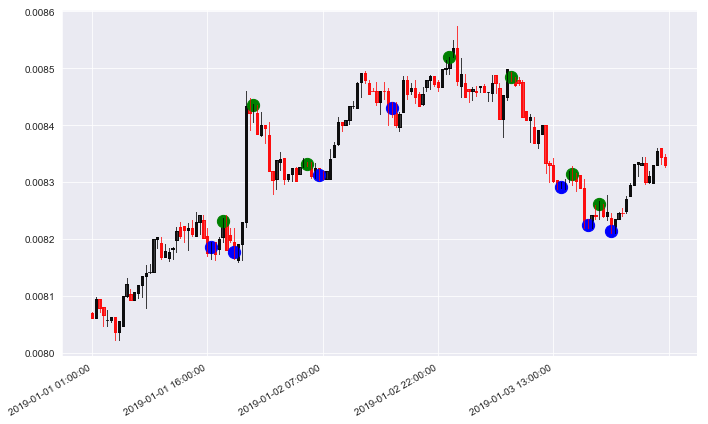

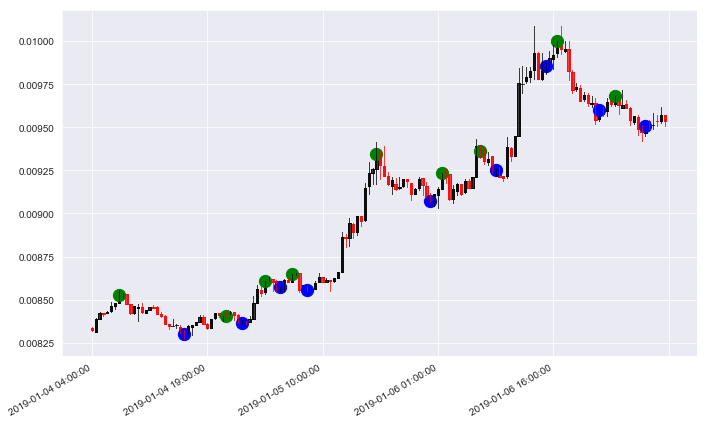

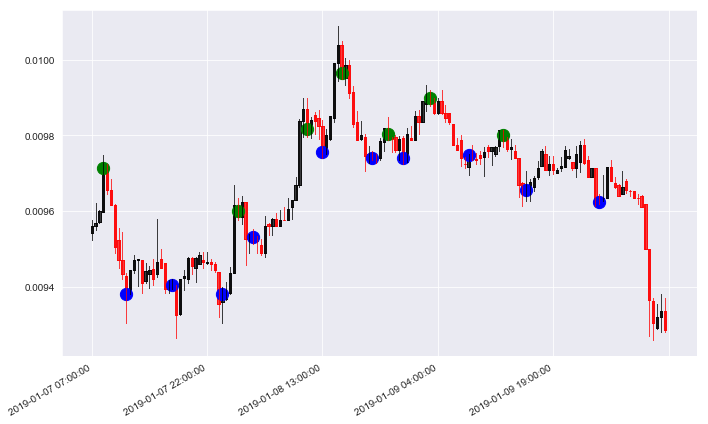

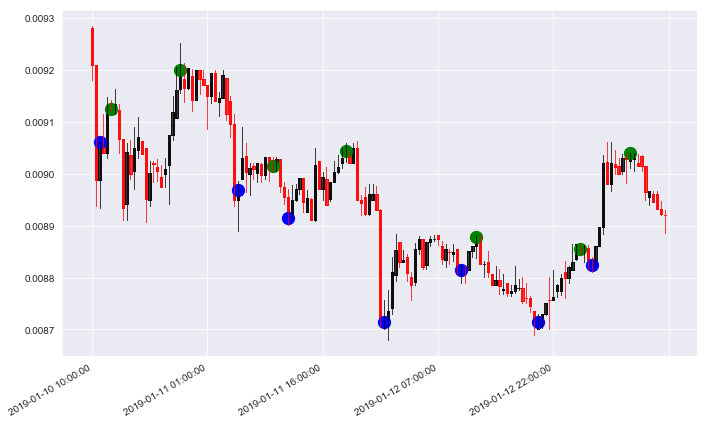

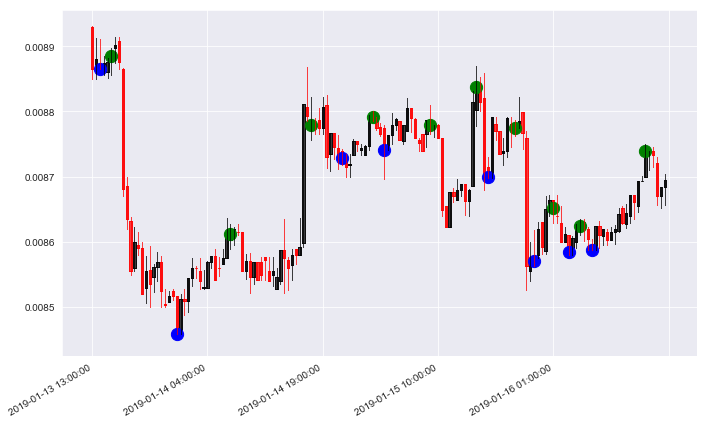

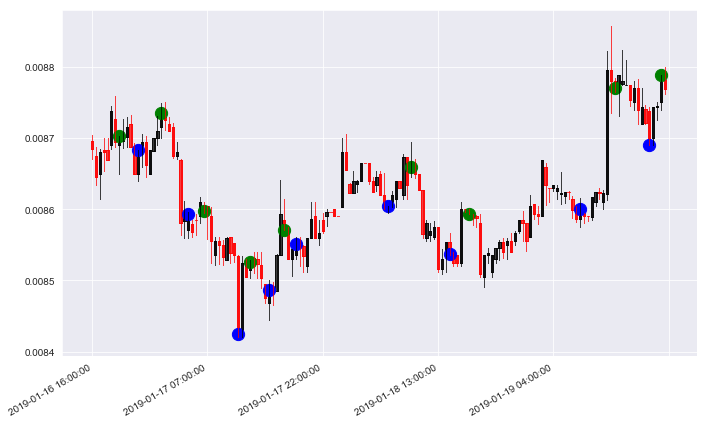

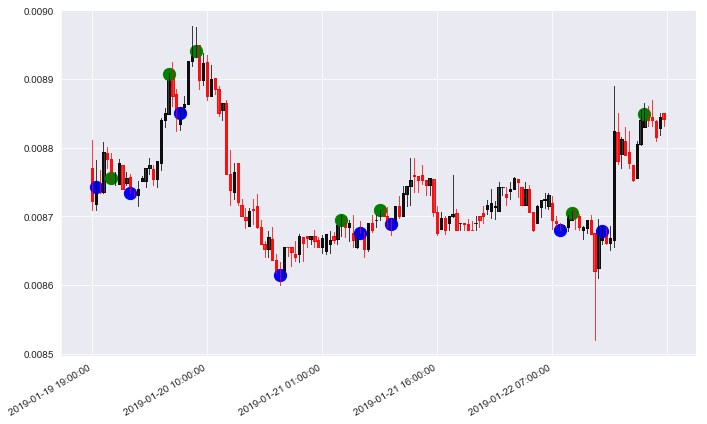

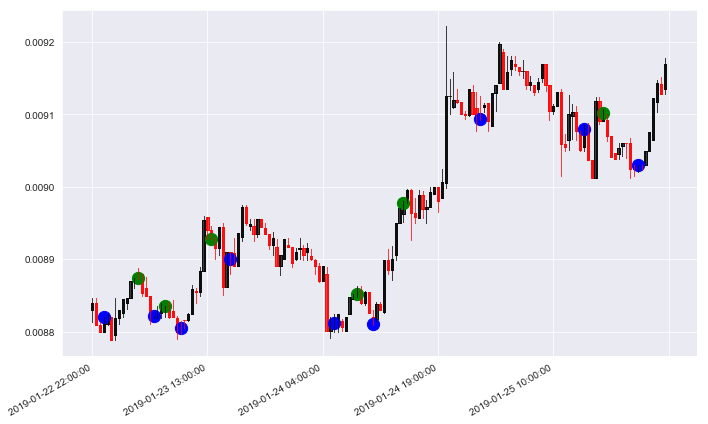

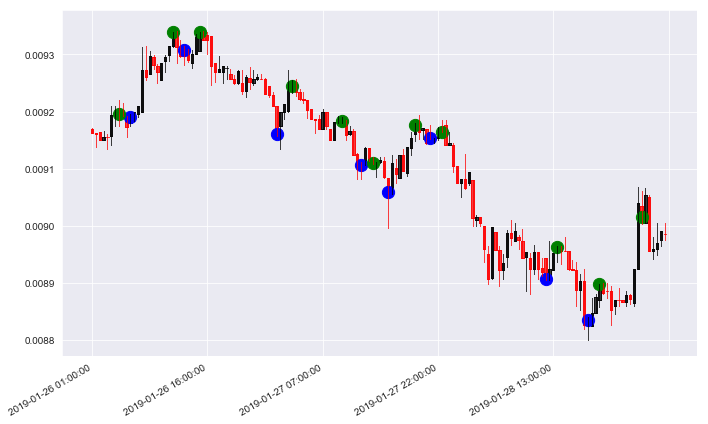

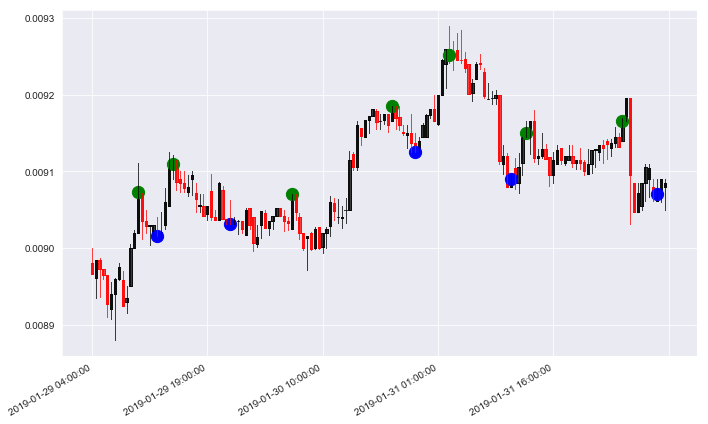

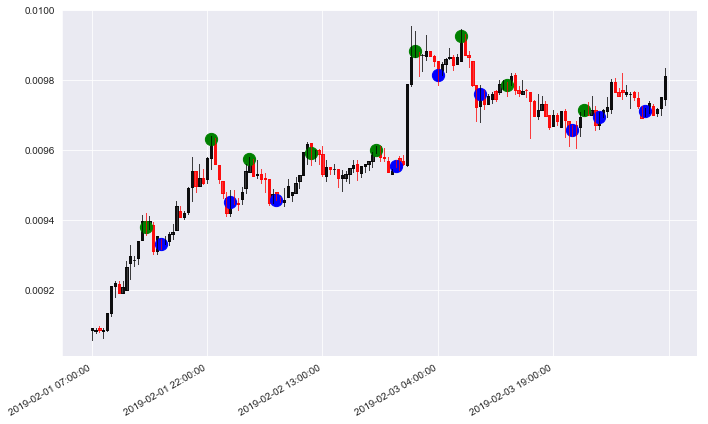

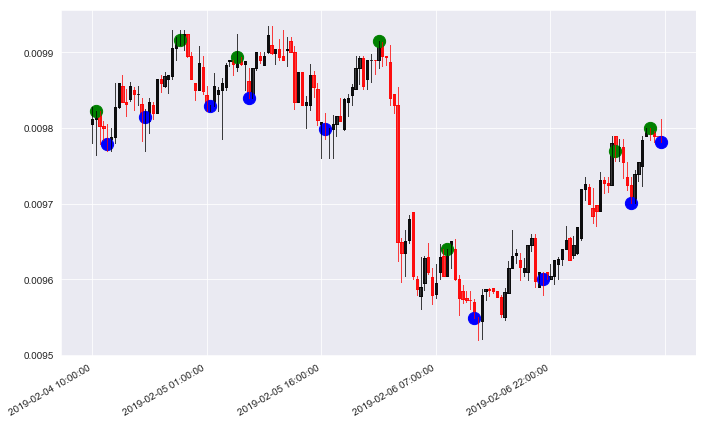

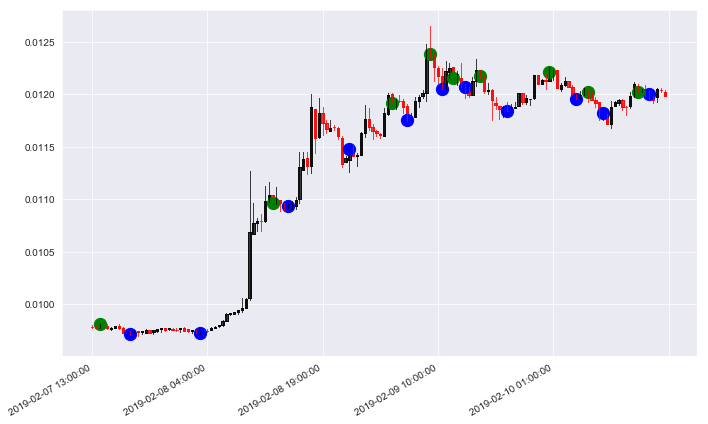

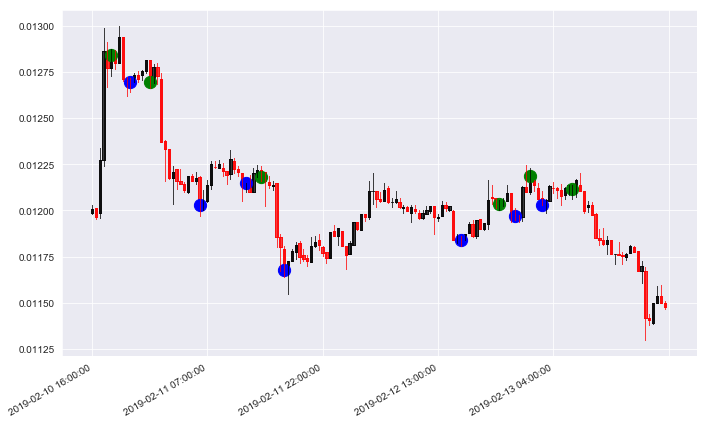

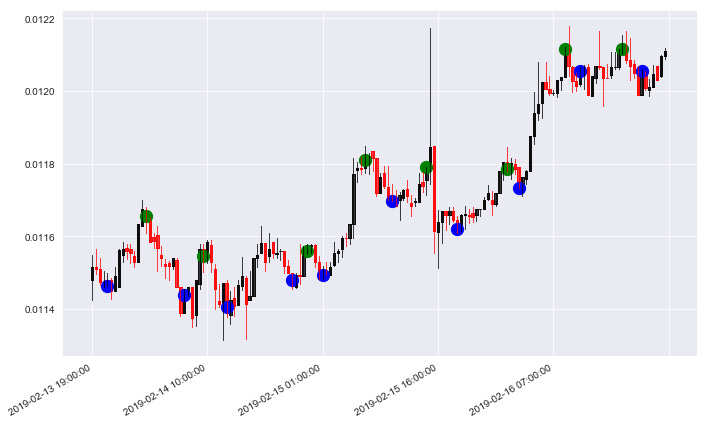

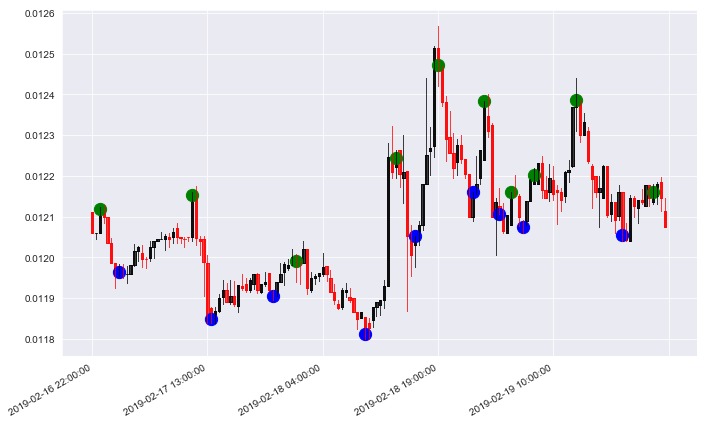

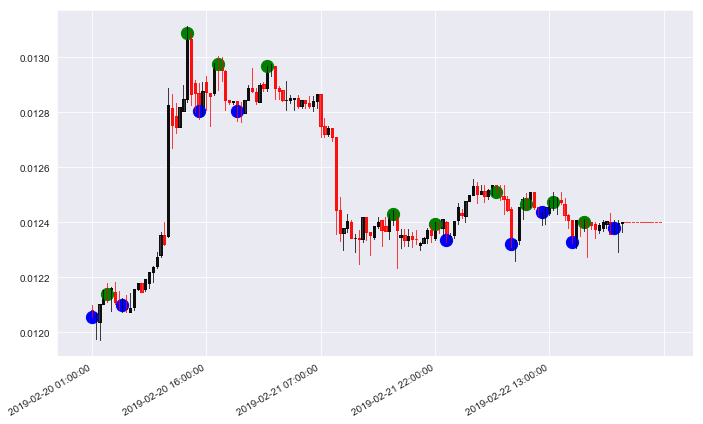

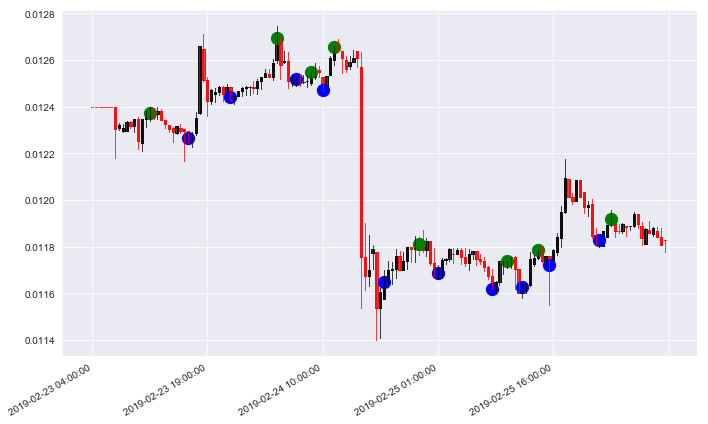

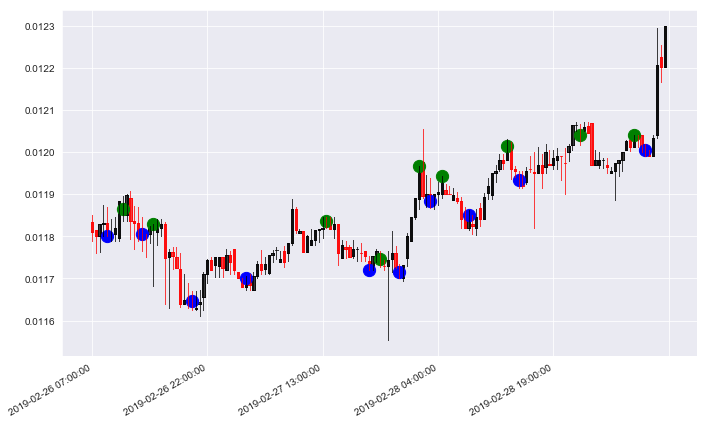

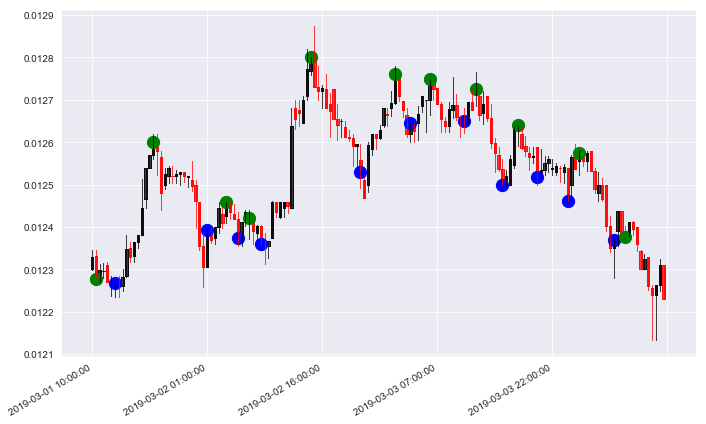

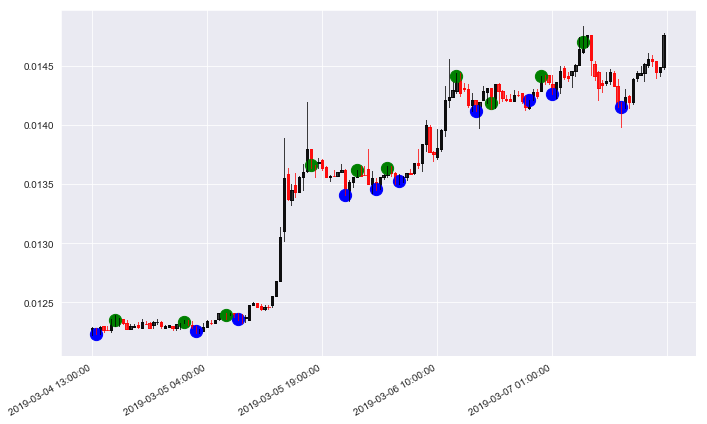

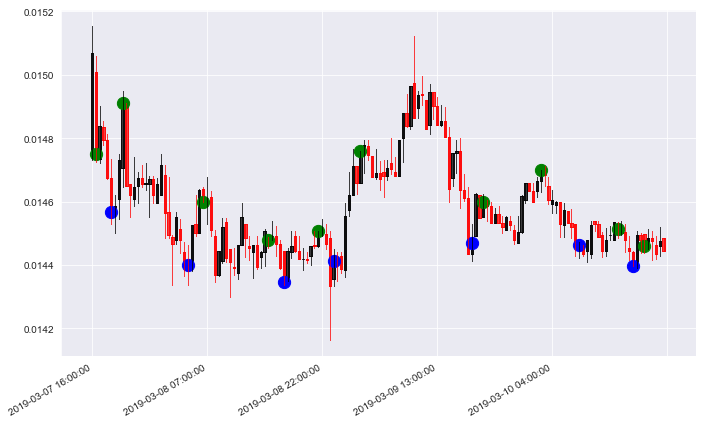

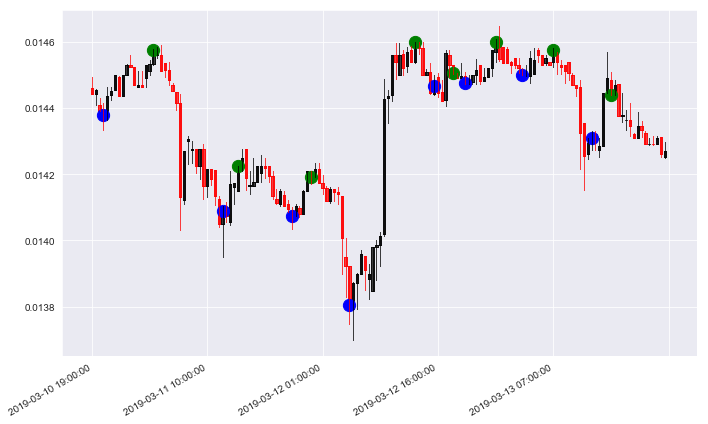

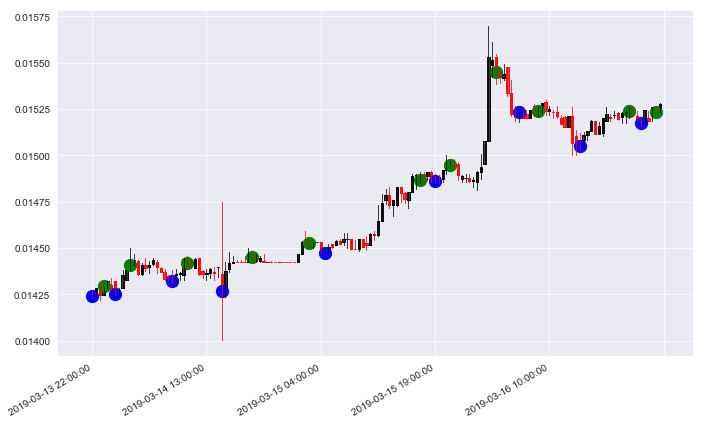

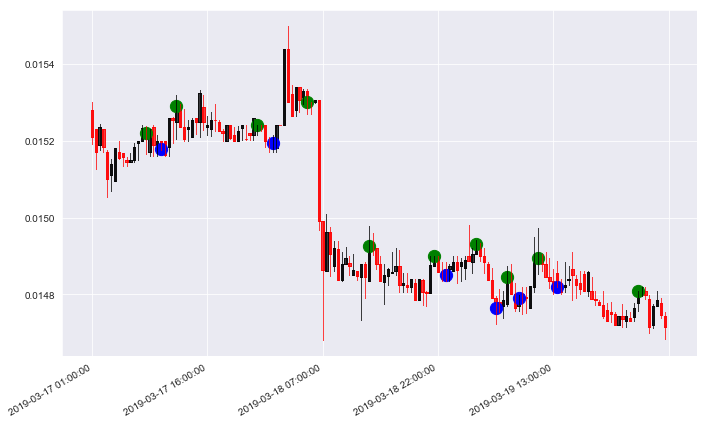

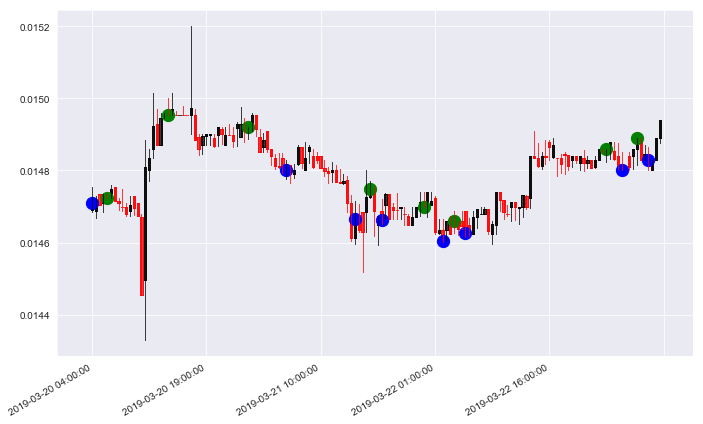

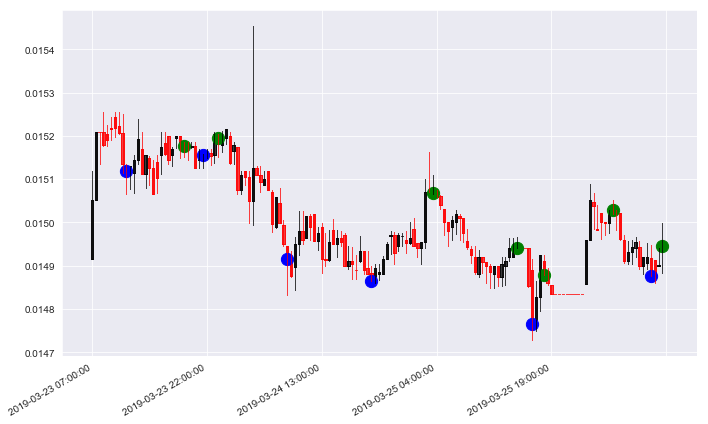

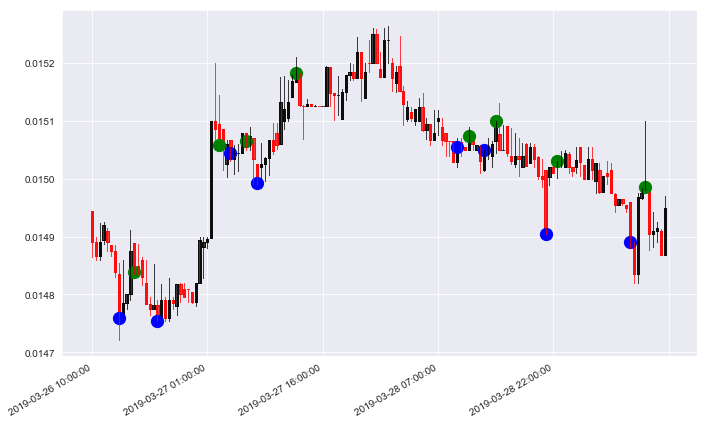

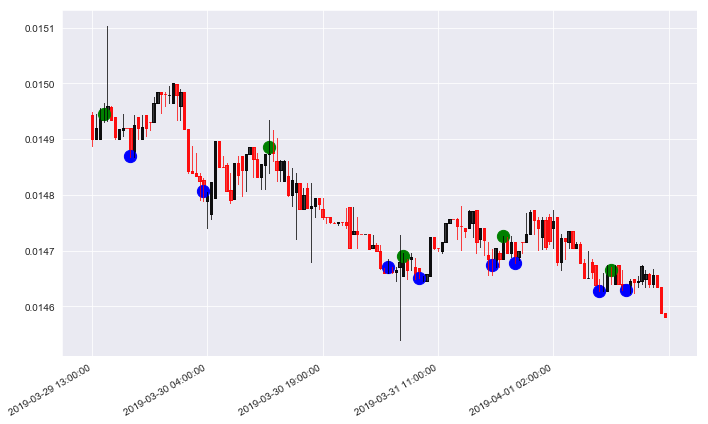

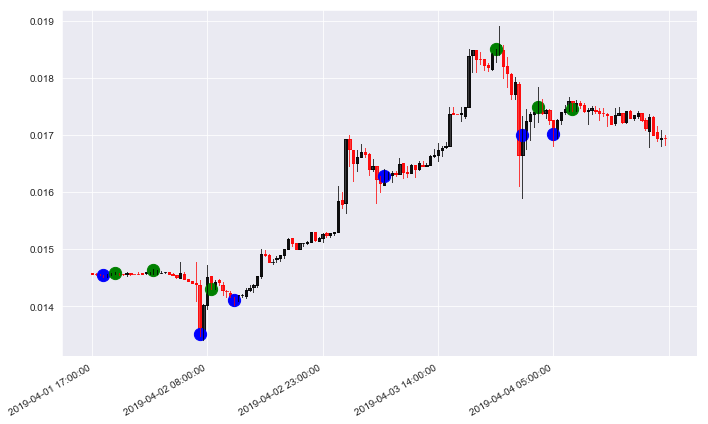

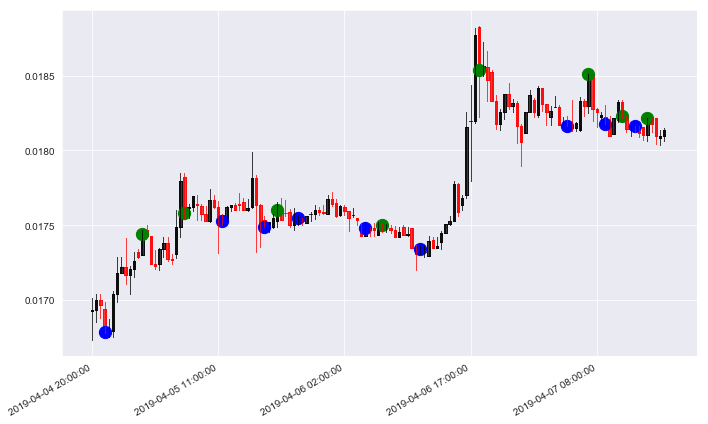

In [113]:
%matplotlib inline
step = 150
for i in range(0, len(selected_data), step):
    to_plot = selected_data.iloc[i:i+step].reset_index()
    plot_ohlc_with_points(to_plot, s, r)